In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

from sklearn.linear_model import LinearRegression as LR

In [2]:
data = np.loadtxt('ex1data2.txt',delimiter = ',')
X = np.c_[np.ones(data.shape[0]),data[:,0:2]]
y = np.c_[data[:,2]]

In [3]:
def Normalization(X):
    columns = X.shape[1]
    # Par store mu and std for each column
    par = np.zeros([2,columns])
    par[1,0] = 1 #std for first column is 1 to avoid X/0 cases
    for col in range(1,columns):
        x = X[:,col]
        par[0,col] = st.mean(x)
        par[1,col] = st.pstdev(x)
        X[:,col] = [(x-par[0,col])/par[1,col] for x in x]
    
    return X, par

X,par = Normalization(X)

In [4]:
def ComputeCost(X,y,theta =np.zeros([X.shape[1],1])):
    m = y.size
    
    Cost = 1/2/m*sum((X.dot(theta)-y)**2)
    return Cost

In [5]:
ComputeCost(X,y)

array([6.55915481e+10])

In [6]:
def gradientDescent(X,y,theta = np.zeros([X.shape[1],1]), alpha = 0.1, num_iter = 200):
    m = y.size
    Cost_hist = np.zeros([num_iter,1])
    
    for _ in range(num_iter):
        theta = theta - alpha/m*(X.T.dot(X.dot(theta)-y))
        Cost_hist[_] = ComputeCost(X,y,theta)
    
    return theta, Cost_hist
        

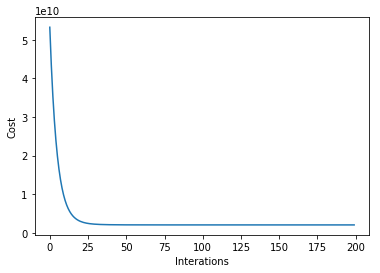

In [7]:
theta, Cost_hist = gradientDescent(X,y)
plt.plot(Cost_hist); plt.xlabel('Interations'); plt.ylabel('Cost');

In [8]:
# Prdict Value for a house 
area, BR = 1000, 2
x = [1, area, BR]
x = (x - par[0,:])/par[1,:]
price = x.dot(theta)
print('For a flat with area:', area, 'and', BR, 'BR, Price:', price)

For a flat with area: 1000 and 2 BR, Price: [211330.52941228]


In [9]:
# Normal Equation
theta1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# LR library
regr = LR(); regr.fit(X[:,1:3],y);
theta2 = np.c_[(regr.intercept_.reshape(-1,1),regr.coef_)].T

Cost, Cost_NE, Cost_LR = ComputeCost(X,y,theta),ComputeCost(X,y,theta1),ComputeCost(X,y,theta2)



In [10]:
print('Theta from GD: ', np.round_(theta.ravel(),1),'Cost:',Cost)
print('Normal Theta:' ,np.round_(theta1.ravel(),1),'Cost:',Cost_NE)
print('LR Theta:' ,np.round_(theta2.ravel(),1),'Cost:',Cost_LR)

Theta from GD:  [340412.7 109440.6  -6571.2] Cost: [2.04328007e+09]
Normal Theta: [340412.7 109447.8  -6578.4] Cost: [2.04328005e+09]
LR Theta: [340412.7 109447.8  -6578.4] Cost: [2.04328005e+09]
